Analyse de données du lab 4 de TPA. Électrolyse de l'eau.


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as spicy

from scipy.optimize import curve_fit, root_scalar

# Configuration de la police (désactiver explicitement LaTeX)
plt.rcParams.update({
    "text.usetex": False,
    "axes.labelsize": 24,
    "xtick.labelsize": 24,
    "ytick.labelsize": 24,
    "legend.fontsize": 20,
    "font.family": "DejaVu Serif"
})

In [75]:
# Données expérimentales d'électrolyse
electrodes = [
    'Laiton',
    'Cuivre- Carbon+ V2',
    'Aluminium',
    'Stainless',
    'Stainless (concentration++)',
    'Carbone',
    'Titane',
    'Titane- carbone+'
]

# Données mesurées
concentration_NaHCO3 = [1.81e-2, 1.81e-2, 1.81e-2, 1.81e-2, 0.044928193 , 1.81e-2, 1.81e-2, 1.81e-2]
courant_stable = [0.52, 0.52, 0.545, 0.63, 1.5, 0.6, 0.014, 0.5]  # [A]
tension_stable = [10, 10, 10, 10, 10, 10, 30.9, 10.01]  # [V]
temps = [592, 550, 519, 400, 121, 390, 1260, 715]  # [s]
volume_H2 = [42, 40, 41, 34, 30, 32, 0.5, 47]  # [ml]
volume_O2 = [17, 15, 16, 8, 14, 18, 0.5, 23]  # [ml]
surface_anode = [1.532627e-4, 1.532627e-4, 1.532627e-4, 1.532627e-4, 1.532627e-4, 1.532627e-4, 1.395570e-4, 1.508405e-4]  # [m²]
surface_cathode = [8.353691e-5, 8.154200e-5, 8.353691e-5, 9.949620e-5, 1.034860e-4, 1.034860e-4, 1.195570e-4, 1.395570e-4]  # [m²]

# Créer un DataFrame pour faciliter l'analyse
data = {
    'Électrodes': electrodes,
    'Concentration NaHCO₃ [g/g]': concentration_NaHCO3,
    'Courant [A]': courant_stable,
    'Tension [V]': tension_stable,
    'Temps [s]': temps,
    'Volume H₂ [ml]': volume_H2,
    'Volume O₂ [ml]': volume_O2,
    'Surface anode [m²]': surface_anode,
    'Surface cathode [m²]': surface_cathode
}

df = pd.DataFrame(data)

# Calculs dérivés
df['Puissance [W]'] = df['Courant [A]'] * df['Tension [V]']
df['Énergie [J]'] = df['Puissance [W]'] * df['Temps [s]']
df['Taux H₂ [ml/s]'] = df['Volume H₂ [ml]'] / df['Temps [s]']
df['Taux O₂ [ml/s]'] = df['Volume O₂ [ml]'] / df['Temps [s]']
df['Ratio H₂/O₂'] = df['Volume H₂ [ml]'] / df['Volume O₂ [ml]']
df['Efficacité [ml H₂/Wh]'] = (df['Volume H₂ [ml]'] / df['Énergie [J]']) * 3600
df['Résistance [Ω]'] = df['Tension [V]'] / df['Courant [A]']

# Afficher le tableau
print("="*120)
print("DONNÉES EXPÉRIMENTALES - ÉLECTROLYSE DE L'EAU")
print("="*120)
print(df.to_string(index=False))
print("\n" + "="*120)
print("Données importées avec succès!")
print(f"Nombre de configurations: {len(df)}")
print("="*120)

DONNÉES EXPÉRIMENTALES - ÉLECTROLYSE DE L'EAU
                 Électrodes  Concentration NaHCO₃ [g/g]  Courant [A]  Tension [V]  Temps [s]  Volume H₂ [ml]  Volume O₂ [ml]  Surface anode [m²]  Surface cathode [m²]  Puissance [W]  Énergie [J]  Taux H₂ [ml/s]  Taux O₂ [ml/s]  Ratio H₂/O₂  Efficacité [ml H₂/Wh]  Résistance [Ω]
                     Laiton                    0.018100        0.520        10.00        592            42.0            17.0            0.000153              0.000084         5.2000     3078.400        0.070946        0.028716     2.470588              49.116424       19.230769
         Cuivre- Carbon+ V2                    0.018100        0.520        10.00        550            40.0            15.0            0.000153              0.000082         5.2000     2860.000        0.072727        0.027273     2.666667              50.349650       19.230769
                  Aluminium                    0.018100        0.545        10.00        519            41.0         

## Analyse 1 : Comparaison des électrodes principales

Sélection des configurations pour la première analyse comparative.

In [76]:
# Sélection des électrodes pour l'analyse 1
electrodes_analyse1 = [
    'Laiton',
    'Cuivre- Carbon+ V2',
    'Aluminium',
    'Stainless',
    'Carbone',
        'Titane- carbone+'
]

# Filtrer le DataFrame pour ne garder que ces configurations
df_analyse1 = df[df['Électrodes'].isin(electrodes_analyse1)].copy()

# Renommer les électrodes pour l'analyse
df_analyse1['Électrodes'] = df_analyse1['Électrodes'].replace({
    'Cuivre- Carbon+ V2': 'Cuivre',
    'Stainless': 'Acier inoxydable',
    'Titane- carbone+': 'Titane'
})

# Réorganiser par ordre alphabétique ou selon votre préférence
df_analyse1 = df_analyse1.reset_index(drop=True)

print("="*120)
print("ANALYSE 1 - COMPARAISON DES ÉLECTRODES PRINCIPALES")
print("="*120)
print(df_analyse1.to_string(index=False))
print("\n" + "="*120)
print(f"Nombre de configurations sélectionnées: {len(df_analyse1)}")
print("="*120)

# Afficher un résumé statistique
print("\n" + "="*120)
print("STATISTIQUES DESCRIPTIVES - ANALYSE 1")
print("="*120)
print(df_analyse1[['Courant [A]', 'Tension [V]', 'Volume H₂ [ml]', 'Efficacité [ml H₂/Wh]']].describe())
print("="*120)

ANALYSE 1 - COMPARAISON DES ÉLECTRODES PRINCIPALES
      Électrodes  Concentration NaHCO₃ [g/g]  Courant [A]  Tension [V]  Temps [s]  Volume H₂ [ml]  Volume O₂ [ml]  Surface anode [m²]  Surface cathode [m²]  Puissance [W]  Énergie [J]  Taux H₂ [ml/s]  Taux O₂ [ml/s]  Ratio H₂/O₂  Efficacité [ml H₂/Wh]  Résistance [Ω]
          Laiton                      0.0181        0.520        10.00        592            42.0            17.0            0.000153              0.000084          5.200     3078.400        0.070946        0.028716     2.470588              49.116424       19.230769
          Cuivre                      0.0181        0.520        10.00        550            40.0            15.0            0.000153              0.000082          5.200     2860.000        0.072727        0.027273     2.666667              50.349650       19.230769
       Aluminium                      0.0181        0.545        10.00        519            41.0            16.0            0.000153            

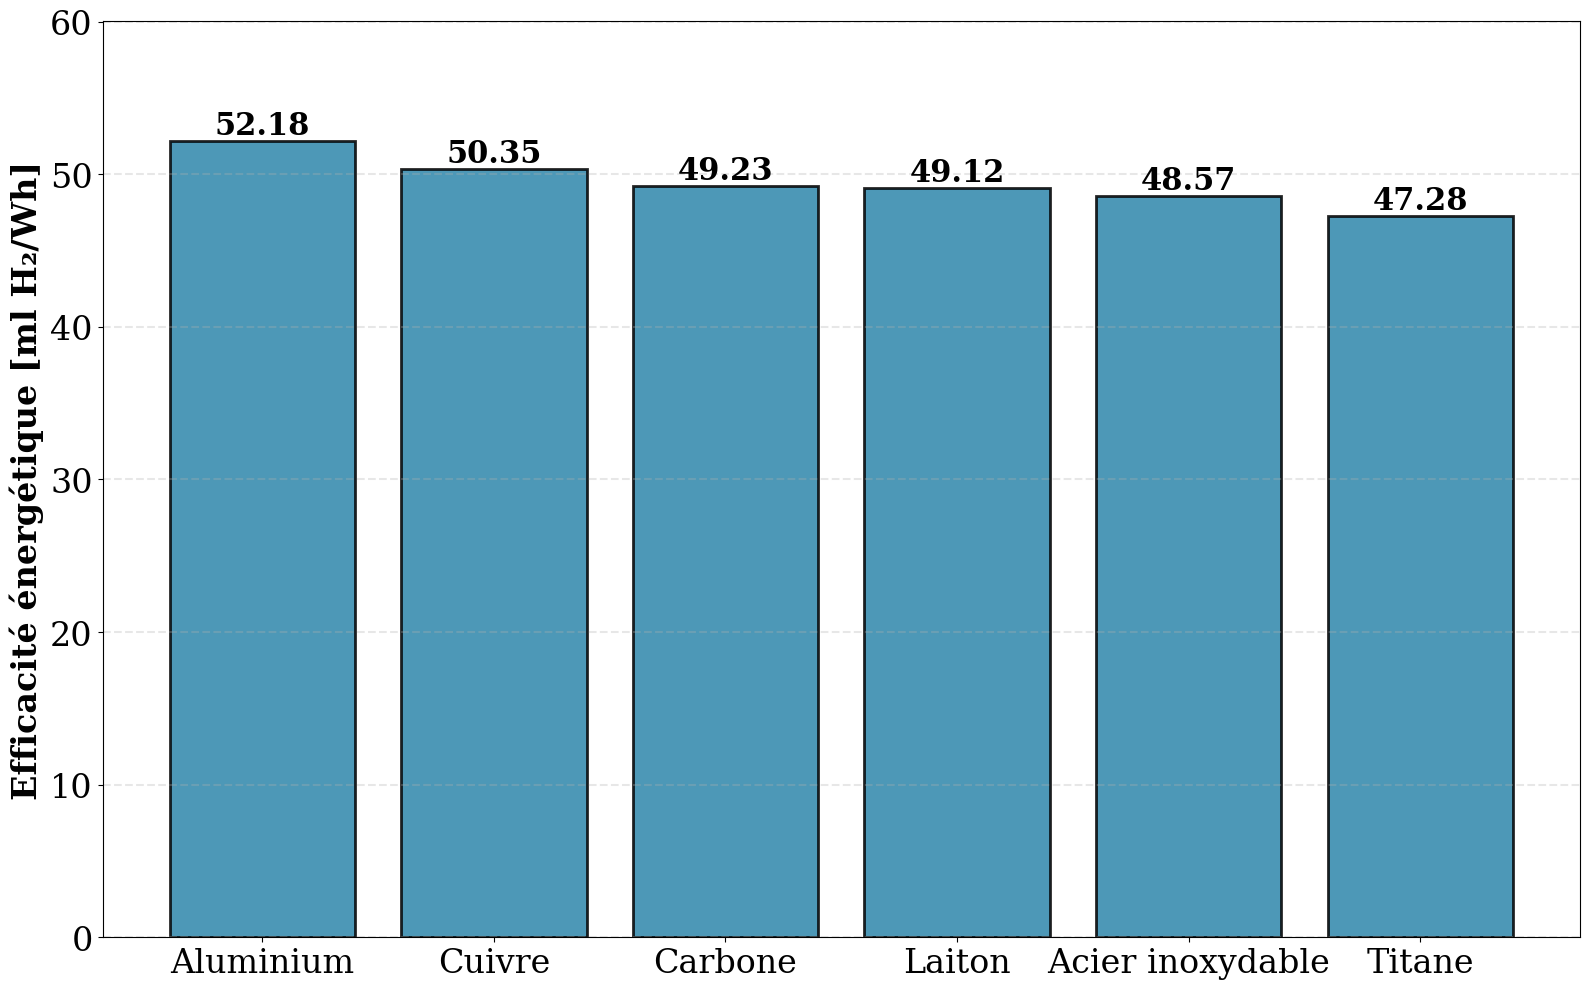


CLASSEMENT PAR EFFICACITÉ ÉNERGÉTIQUE
1. Aluminium            :   52.182 ml H₂/Wh
2. Cuivre               :   50.350 ml H₂/Wh
3. Carbone              :   49.231 ml H₂/Wh
4. Laiton               :   49.116 ml H₂/Wh
5. Acier inoxydable     :   48.571 ml H₂/Wh
6. Titane               :   47.281 ml H₂/Wh


In [77]:
# Graphique de l'efficacité énergétique
fig, ax = plt.subplots(figsize=(16, 10))

# Trier les données par efficacité pour un meilleur visuel
df_sorted = df_analyse1.sort_values('Efficacité [ml H₂/Wh]', ascending=False)

# Créer le graphique à barres
x = np.arange(len(df_sorted))
bars = ax.bar(x, df_sorted['Efficacité [ml H₂/Wh]'], 
              color='#2E86AB',
              edgecolor='black', linewidth=2, alpha=0.85)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=22, fontweight='bold')

# Configuration du graphique
#ax.set_xlabel('Type d\'électrode à la cathode', fontweight='bold')
ax.set_ylabel('Efficacité énergétique [ml H₂/Wh]', fontweight='bold')
#ax.set_title('Efficacité énergétique de production d\'hydrogène\npar type d\'électrode', fontsize=28, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_sorted['Électrodes'], rotation=0, ha='center')
ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=1.5)
ax.set_ylim(0, max(df_sorted['Efficacité [ml H₂/Wh]']) * 1.15)

plt.tight_layout()
plt.show()

# Afficher le classement
print("\n" + "="*80)
print("CLASSEMENT PAR EFFICACITÉ ÉNERGÉTIQUE")
print("="*80)
for i, (idx, row) in enumerate(df_sorted.iterrows(), 1):
    print(f"{i}. {row['Électrodes']:<20} : {row['Efficacité [ml H₂/Wh]']:>8.3f} ml H₂/Wh")
print("="*80)

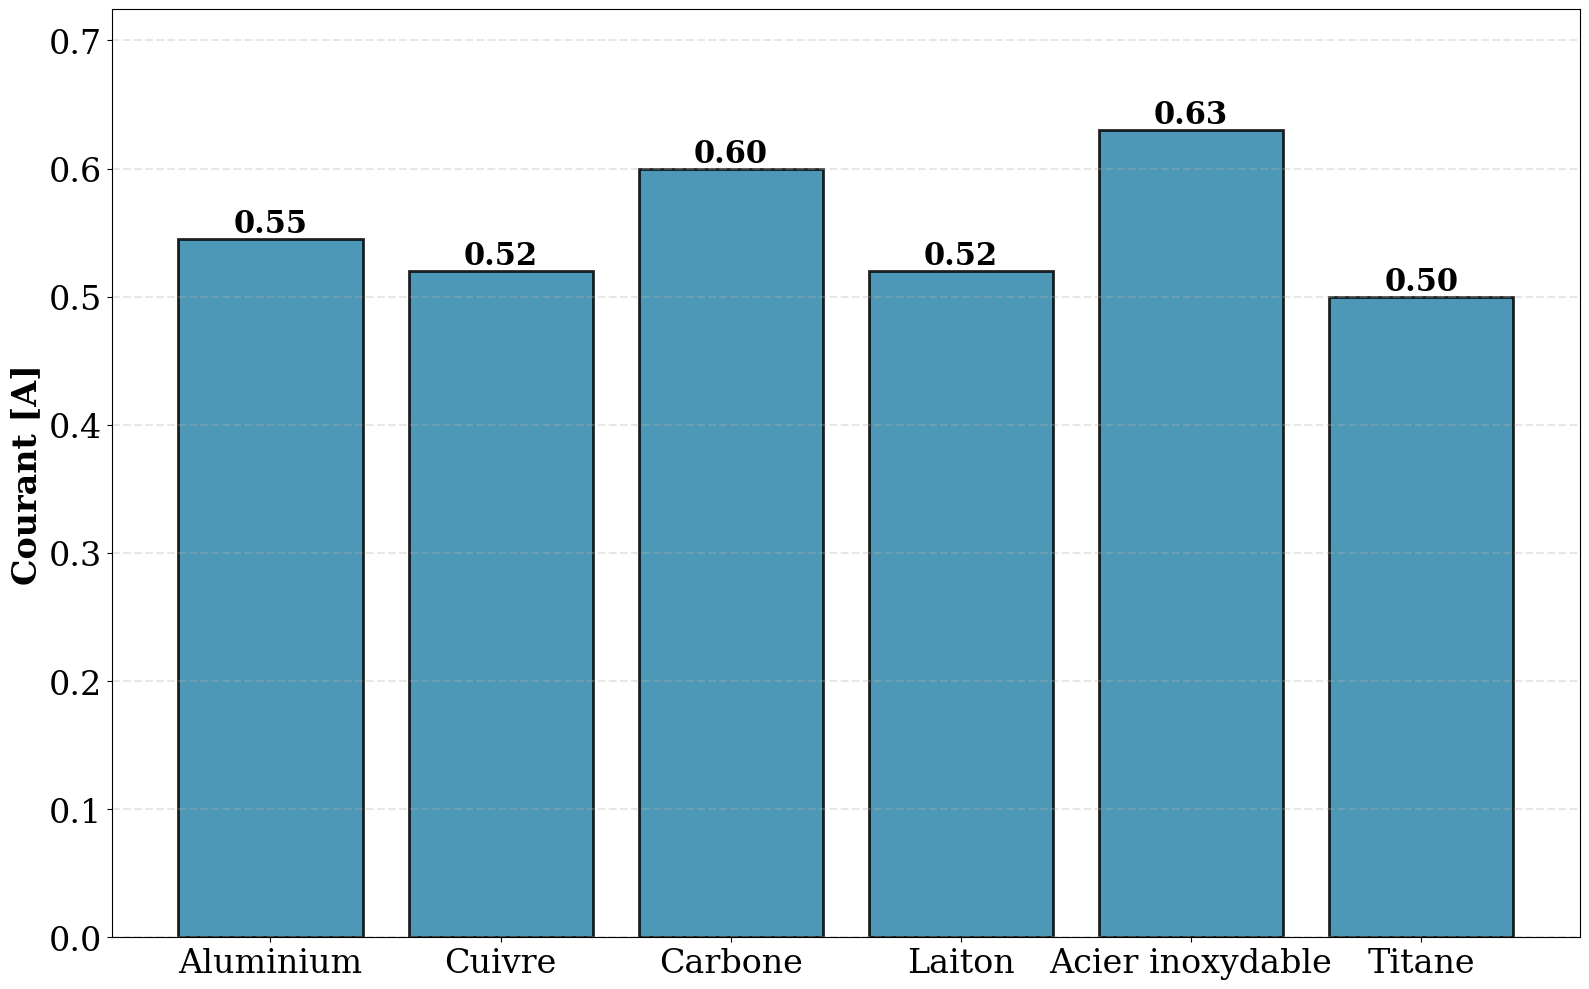

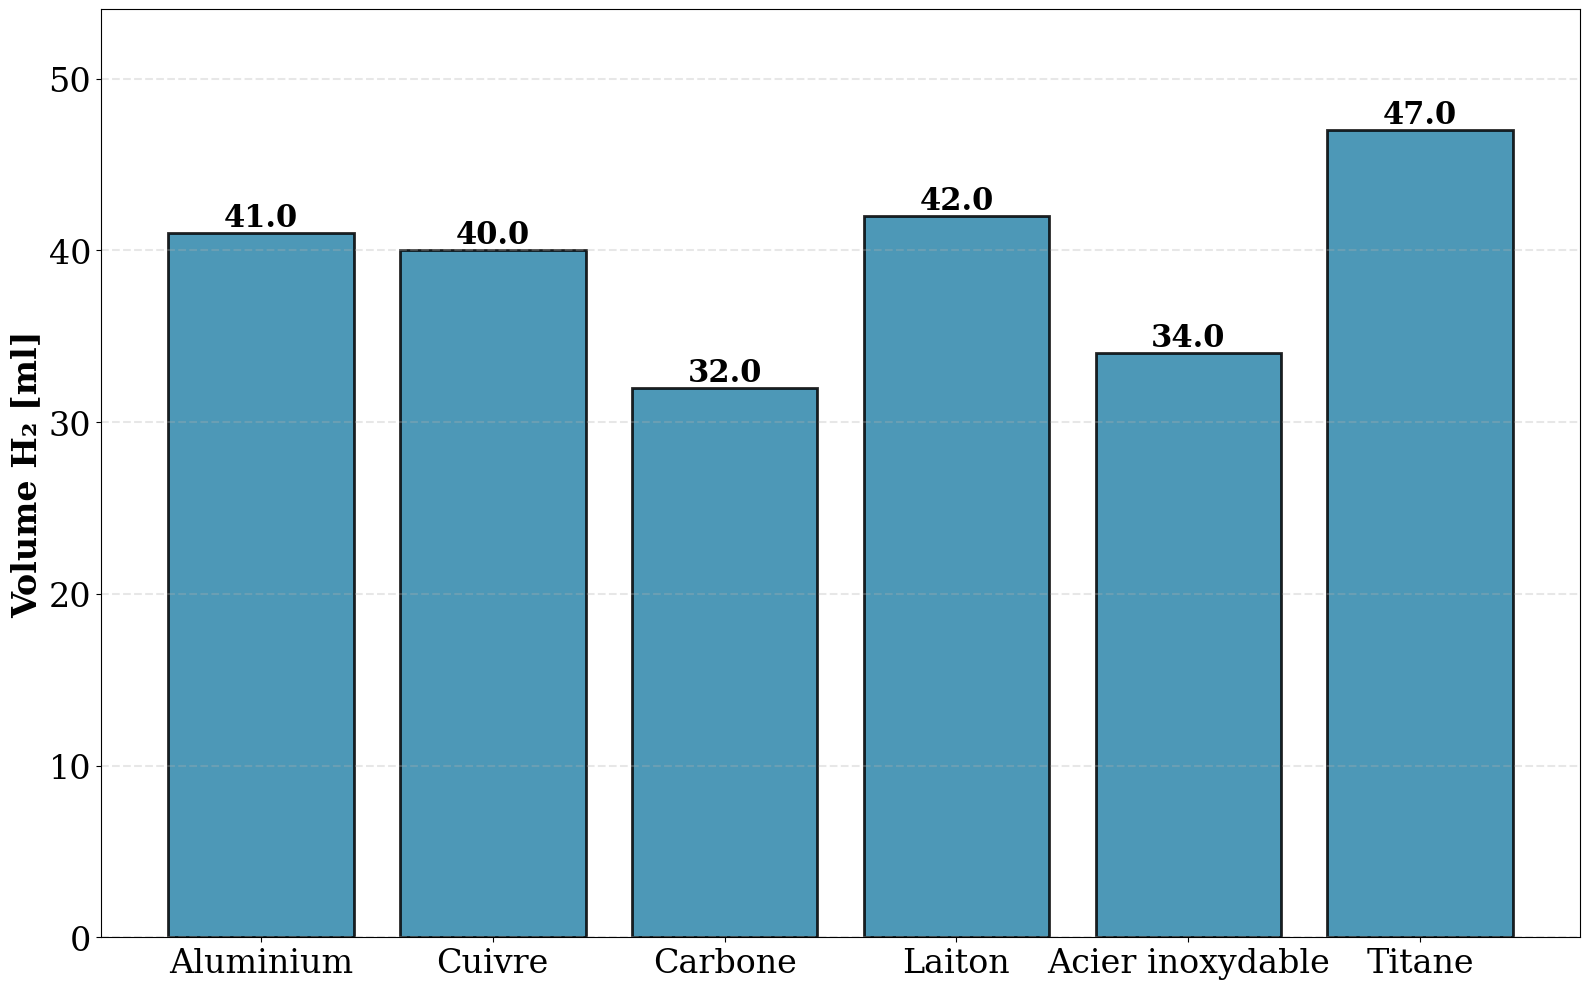

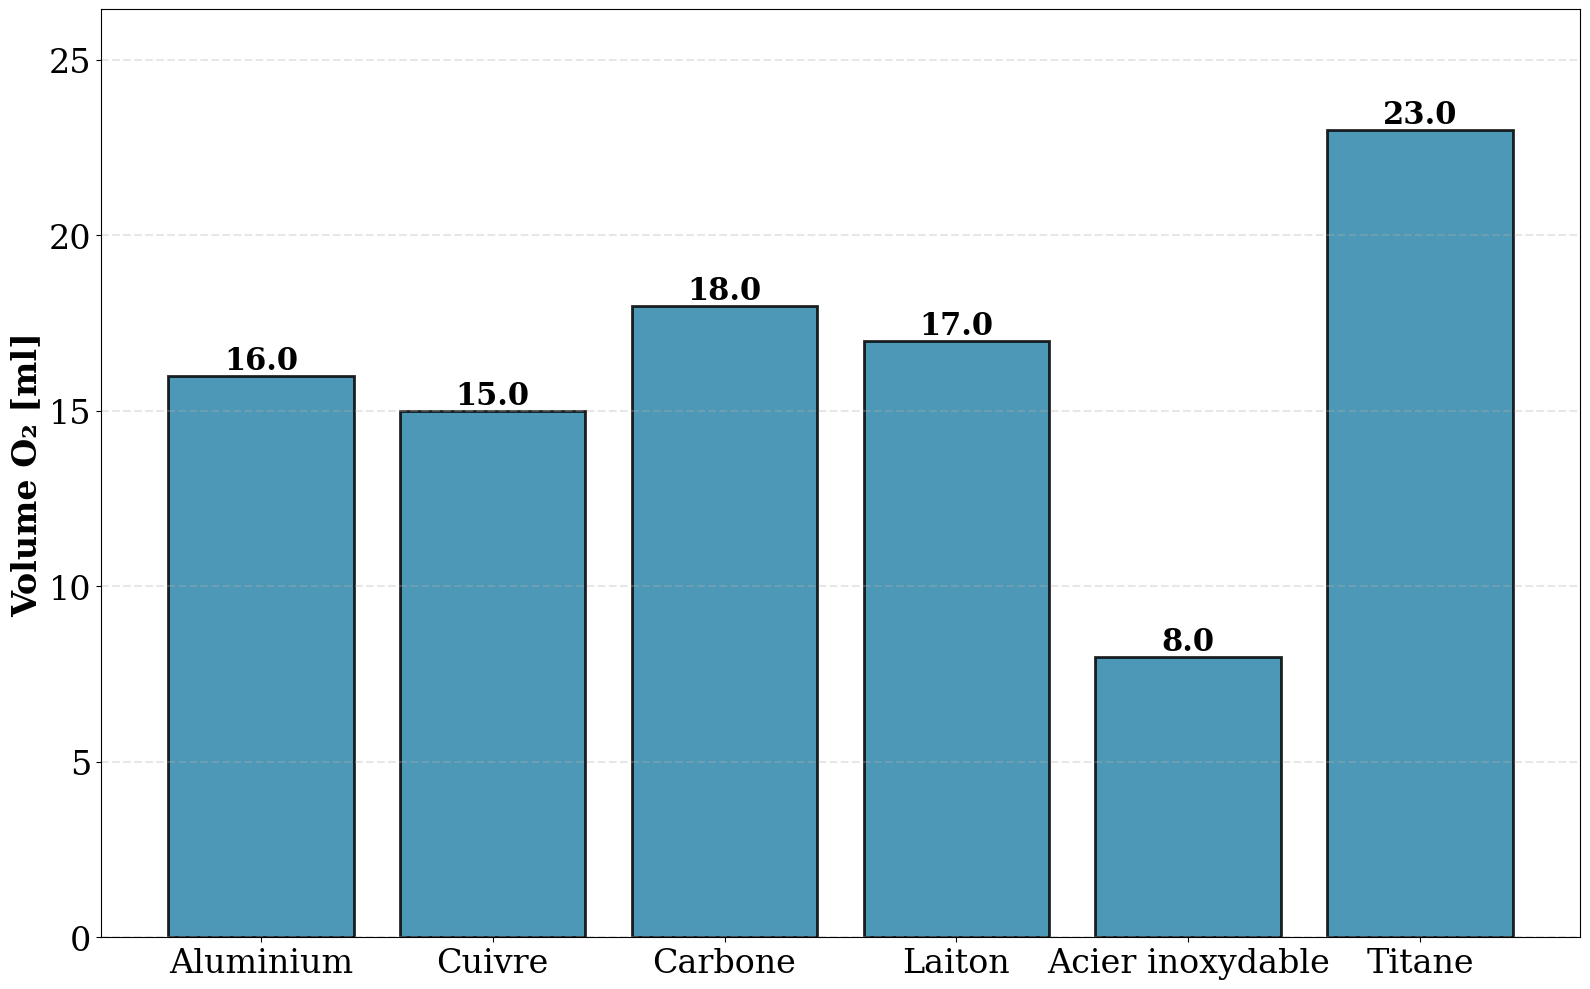

In [78]:
# Utiliser le même ordre que le graphique d'efficacité
x = np.arange(len(df_sorted))
electrodes_order = df_sorted['Électrodes'].values

# ==================== GRAPHIQUE 1: COURANT ====================
fig1, ax1 = plt.subplots(figsize=(16, 10))

bars1 = ax1.bar(x, df_sorted['Courant [A]'], 
                color='#2E86AB', edgecolor='black', linewidth=2, alpha=0.85)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=22, fontweight='bold')

#
#ax1.set_xlabel('Type d\'électrode à la cathode', fontweight='bold')
ax1.set_ylabel('Courant [A]', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(electrodes_order, rotation=0, ha='center')
ax1.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=1.5)
ax1.set_ylim(0, max(df_sorted['Courant [A]']) * 1.15)

plt.tight_layout()
plt.show()

# ==================== GRAPHIQUE 2: VOLUME H₂ ====================
fig2, ax2 = plt.subplots(figsize=(16, 10))

bars2 = ax2.bar(x, df_sorted['Volume H₂ [ml]'], 
                color='#2E86AB', edgecolor='black', linewidth=2, alpha=0.85)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=22, fontweight='bold')

#ax2.set_xlabel('Type d\'électrode à la cathode', fontweight='bold')
ax2.set_ylabel('Volume H₂ [ml]', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(electrodes_order, rotation=0, ha='center')
ax2.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=1.5)
ax2.set_ylim(0, max(df_sorted['Volume H₂ [ml]']) * 1.15)

plt.tight_layout()
plt.show()

# ==================== GRAPHIQUE 3: VOLUME O₂ ====================
fig3, ax3 = plt.subplots(figsize=(16, 10))

bars3 = ax3.bar(x, df_sorted['Volume O₂ [ml]'], 
                color='#2E86AB', edgecolor='black', linewidth=2, alpha=0.85)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=22, fontweight='bold')

#ax3.set_xlabel('Type d\'électrode à la cathode', fontweight='bold')
ax3.set_ylabel('Volume O₂ [ml]', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(electrodes_order, rotation=0, ha='center')
ax3.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=1.5)
ax3.set_ylim(0, max(df_sorted['Volume O₂ [ml]']) * 1.15)

plt.tight_layout()
plt.show()

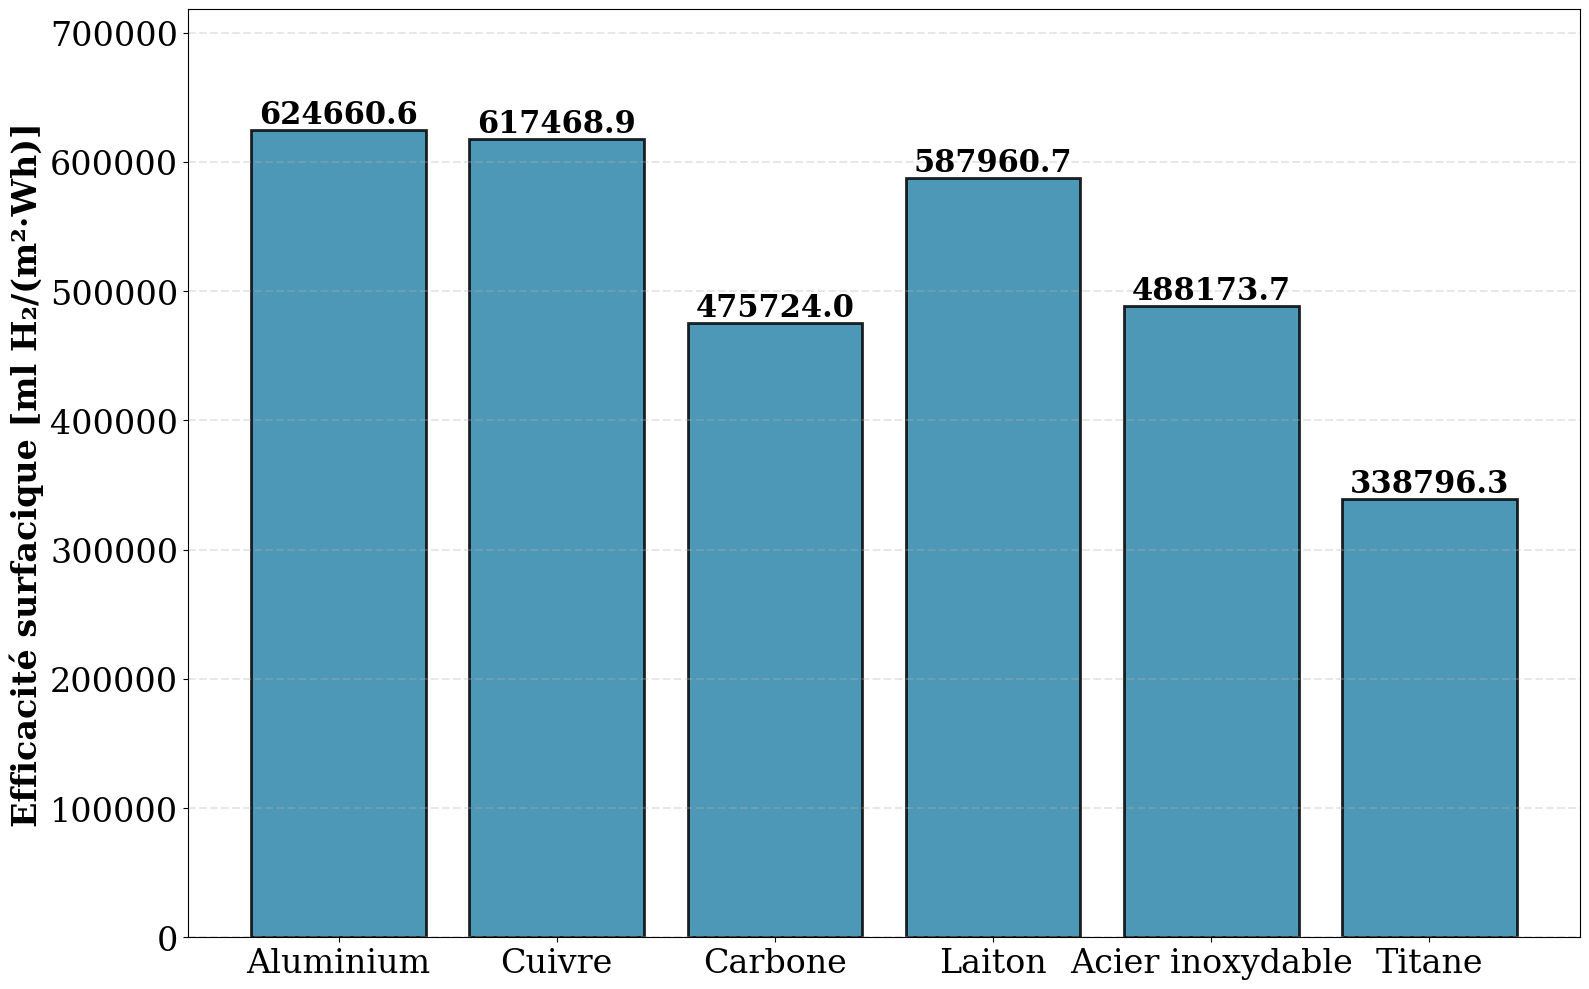


CLASSEMENT PAR EFFICACITÉ SURFACIQUE
1. Aluminium            :   624660.6 ml H₂/(m²·Wh)
2. Cuivre               :   617468.9 ml H₂/(m²·Wh)
3. Laiton               :   587960.7 ml H₂/(m²·Wh)
4. Acier inoxydable     :   488173.7 ml H₂/(m²·Wh)
5. Carbone              :   475724.0 ml H₂/(m²·Wh)
6. Titane               :   338796.3 ml H₂/(m²·Wh)


In [79]:
# ==================== GRAPHIQUE 4: EFFICACITÉ SURFACIQUE ====================
# Calculer l'efficacité surfacique (production H₂ par unité de surface de cathode)
df_sorted['Efficacité surfacique [ml H₂/(m²·Wh)]'] = (df_sorted['Volume H₂ [ml]'] / (df_sorted['Surface cathode [m²]'] * df_sorted['Énergie [J]'])) * 3600

fig4, ax4 = plt.subplots(figsize=(16, 10))

bars4 = ax4.bar(x, df_sorted['Efficacité surfacique [ml H₂/(m²·Wh)]'], 
                color='#2E86AB', edgecolor='black', linewidth=2, alpha=0.85)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars4):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=22, fontweight='bold')

ax4.set_ylabel('Efficacité surfacique [ml H₂/(m²·Wh)]', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(electrodes_order, rotation=0, ha='center')
ax4.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=1.5)
ax4.set_ylim(0, max(df_sorted['Efficacité surfacique [ml H₂/(m²·Wh)]']) * 1.15)

plt.tight_layout()
plt.show()

# Afficher le classement par efficacité surfacique
df_sorted_surf = df_sorted.sort_values('Efficacité surfacique [ml H₂/(m²·Wh)]', ascending=False)
print("\n" + "="*80)
print("CLASSEMENT PAR EFFICACITÉ SURFACIQUE")
print("="*80)
for i, (idx, row) in enumerate(df_sorted_surf.iterrows(), 1):
    print(f"{i}. {row['Électrodes']:<20} : {row['Efficacité surfacique [ml H₂/(m²·Wh)]']:>10.1f} ml H₂/(m²·Wh)")
print("="*80)

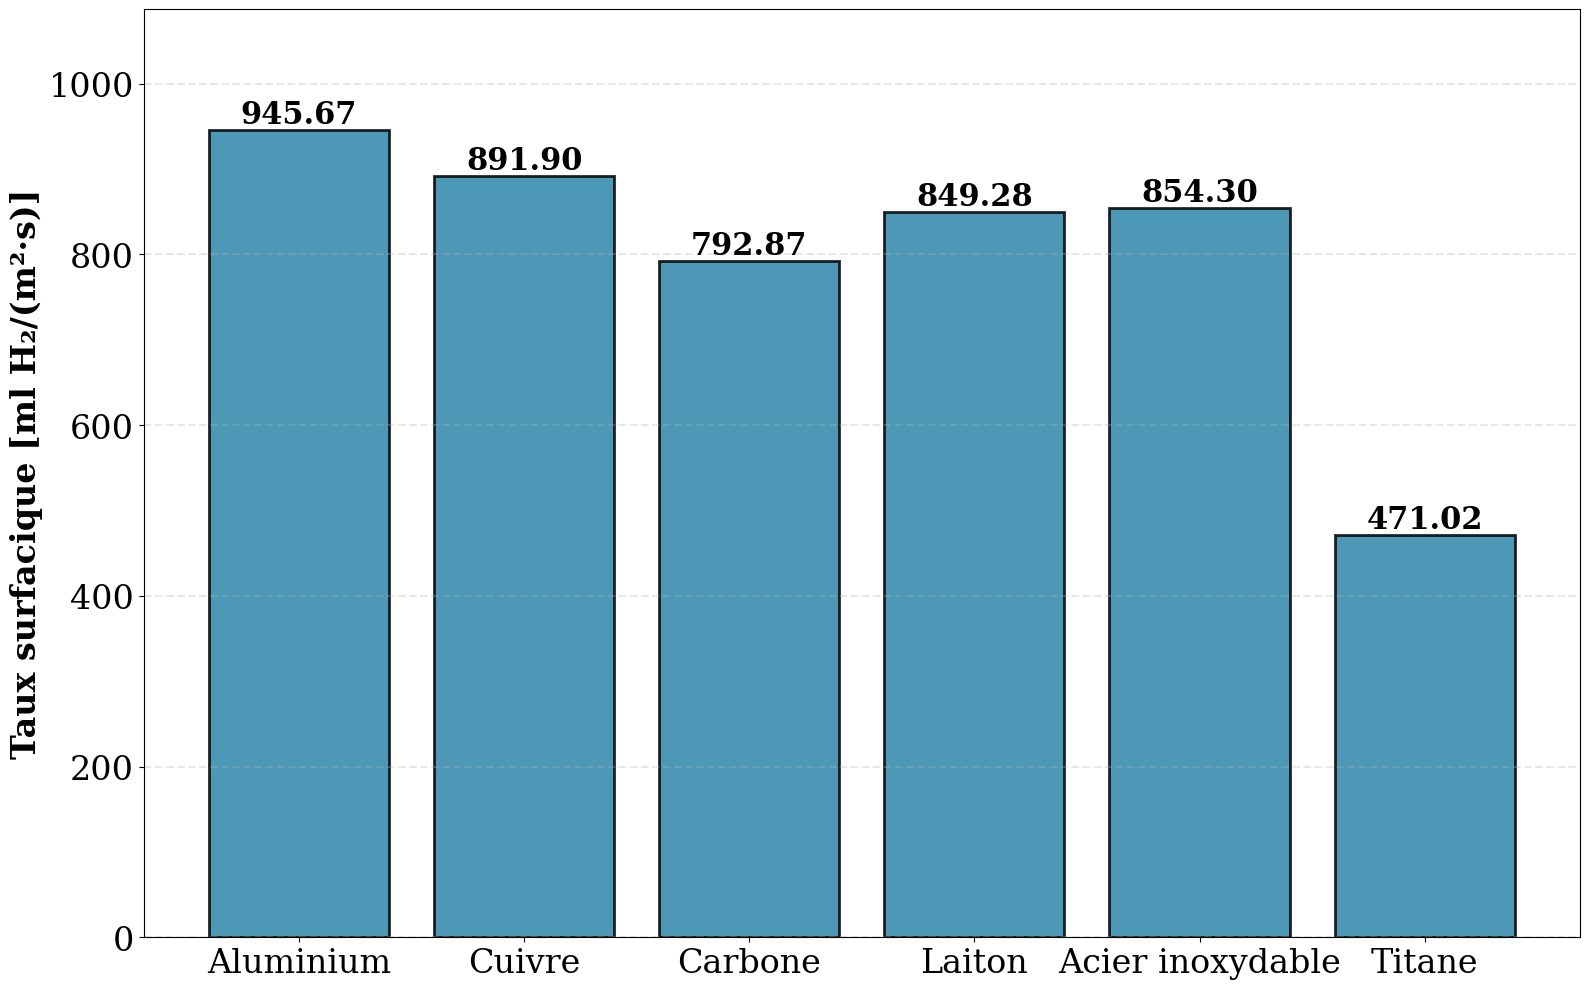


CLASSEMENT PAR TAUX SURFACIQUE
1. Aluminium            :     945.67 ml H₂/(m²·s)
2. Cuivre               :     891.90 ml H₂/(m²·s)
3. Acier inoxydable     :     854.30 ml H₂/(m²·s)
4. Laiton               :     849.28 ml H₂/(m²·s)
5. Carbone              :     792.87 ml H₂/(m²·s)
6. Titane               :     471.02 ml H₂/(m²·s)


In [80]:
# ==================== GRAPHIQUE 5: TAUX SURFACIQUE ====================
# Calculer le taux surfacique (production H₂ par unité de surface de cathode par unité de temps)
df_sorted['Taux surfacique [ml H₂/(m²·s)]'] = df_sorted['Volume H₂ [ml]'] / (df_sorted['Surface cathode [m²]'] * df_sorted['Temps [s]'])

fig5, ax5 = plt.subplots(figsize=(16, 10))

bars5 = ax5.bar(x, df_sorted['Taux surfacique [ml H₂/(m²·s)]'], 
                color='#2E86AB', edgecolor='black', linewidth=2, alpha=0.85)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars5):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=22, fontweight='bold')

ax5.set_ylabel('Taux surfacique [ml H₂/(m²·s)]', fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(electrodes_order, rotation=0, ha='center')
ax5.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=1.5)
ax5.set_ylim(0, max(df_sorted['Taux surfacique [ml H₂/(m²·s)]']) * 1.15)

plt.tight_layout()
plt.show()

# Afficher le classement par taux surfacique
df_sorted_taux = df_sorted.sort_values('Taux surfacique [ml H₂/(m²·s)]', ascending=False)
print("\n" + "="*80)
print("CLASSEMENT PAR TAUX SURFACIQUE")
print("="*80)
for i, (idx, row) in enumerate(df_sorted_taux.iterrows(), 1):
    print(f"{i}. {row['Électrodes']:<20} : {row['Taux surfacique [ml H₂/(m²·s)]']:>10.2f} ml H₂/(m²·s)")
print("="*80)

%Make a table that resumate all the data. 
% Current
% Power
% Volume H_2
% Volume O_2
% Efficacité énergétique
% efficacité surfacique

